In [1]:
from quantum_badger import *
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['svg'] 


# Polynomial Time Approximation for Gaussian Boson Sampling using Threshold Detectors
<img src="images/GBS_main_h.png" alt="Drawing" style="width: 500px;"/>

Quantum computing's information processing can be performed by devices like **Boson Samplers** [1]. Boson Sampler is a non-universal quantum computer based on optics, equipped with single-photon sources at $n$ indistinguishable inputs of an $m$-mode linear interferometer and $m$ photon-counting detectors (where usually $m \gg n^2$). In other words, this device performs quantum interference of single photons and measures the output samples.  A *sample* is a specific measurement outcome, defined as a vector in the Fock basis $\vec{s} = (n_1, n_2, \: ... ,\: n_m)$, where $n_i$ is a number of came photons in $i$ detector. All possible samples form the effective size of the Hilbert space of the Boson Sampling problem, which is a combination ${m +n - 1 \choose n} \sim \left(\frac{m}{n}\right)^n$.  

Here we simulate **Gaussian Boson Sampling** (GBS) protocol is an extension of the Boson Sampling problem proposed in 2017 [2]. Gaussian Boson Sampler consists of squeezed light sources $n$ (single-mode squeezed vacuum states), which interfere in a $m-$mode liner-optical network and then are measured using $m$ photon number-resolving or threshold detectors. Our method is applicable currently only to the GBS problem with thershold detection, i.e. samples consist of zeros and ones. 

Traditional implementations with single-photon sources are limited in scalability. Gaussian boson sampling emerged as an alternative, and recent experiments showcased its **Quantum Advantage** [3](classical computers need exponentially large time to simulate it). However, imperfections like multi-photon collisions when and noise challenge GBS experiments. A new approach, outlined here and described in detail in [4], offers a polynomial-time approximation algorithm for GBS emulation, accounting for threshold detection and multi-photon collisions without considering other sources of error.

*It is worth drawing attention to the fact that we calculate absolute probabilities of randomly generated samples and we do not provide samples from the non-classical distribution.*



---
[1] Aaronson, Scott, and Alex Arkhipov. "The computational complexity of linear optics." Proceedings of the forty-third annual ACM symposium on Theory of computing. 2011.

[2] Hamilton, Craig S., et al. "Gaussian boson sampling." Physical review letters 119.17 (2017): 170501.

[3] Zhong, Han-Sen, et al. "Quantum computational advantage using photons." Science 370.6523 (2020): 1460-1463.

[4] Popova, A. S., and A. N. Rubtsov. "Cracking the Quantum Advantage threshold for Gaussian Boson Sampling." arXiv preprint arXiv:2106.01445 (2021).

# Computing Probabilities with Quantum Badger
<img src="images/qb_image_2.png" alt="Drawing" style="width: 300px;"/>
    
    
Generally speaking, this operation mode needs __the complex GBS matrix__ and __samples__. To get the matrix, you need to initialize the GBS simulator. The samples can be generated from a uniform distribution for a fixed number of clicked detectors, or you can import your own samples. 

## Initialize the Gaussian Boson Sampling Emulator

There are 2 options for the initialization: 

1) Import parameters of your GBS device, including the interferometer matrix and set the parameters of the input state manually; 
2) Use a default GBS setup: half of the input states will be filled by squeezed vacuum states, and a random interferometer matrix will be generated.

### Option 1: Import parameters of your GBS device

__Step 0:__ Create folders for the data.

Here, we highly recommend creating the directory for the current data using the `create_path(filename='tutorial.ipynb')` method. This will ensure that all input and output files are appropriately organized in the `/data` directory.

__Step 1:__ Set the GBS device parameters, such as 

* number of modes `m`
* number of inputs filled by squeezed states `n`
* squeezing parameter of the input squeezed vacuum states `r`

__Step 2:__ Import the interferometer matrix 

You must have a `matrix_U.dat` file for this regime in your directory. Here and further, we record the real part of complex numbers in odd columns, which are tabular separated from the image part in even columns. 

__Step 3:__ Export the main GBS matrix 

The result matrix will be saved in a file `GBS_matrix.dat`


In [2]:
# Step 0: create foldes for the data

#path = create_path(filename='tutorial.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"

# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Set the GBS device parameters

#  Number of modes 
m = 10
#  Number of input squeezed states
n = round(m/2) 
#  Squeezing parameter of the input squeezed vacuum states
r = 1.6

r_, phi_ = input_state(r, m, n) 
# it creates two lists of parameters you can do this manually, for example 
# r_ = [r]*n + [0]*(m-n)
# phi_ = [0]*m

A = set_input(r_, phi_, path)

# Step 2: Import the interferometer matrix
U = import_interferometer(path, "/matrix_U.dat") 

# Step 3: Export the main GBS matrix 
M = set_device_parameters(r, A, U, path)


Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/initial_state.dat
Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023/GBS_matrix.dat


### Option 2: Use a default GBS setup

__Step 0:__ Create foldes for the data. 

Here, we highly recommend creating the directory for the current data using the `create_path(filename='tutorial.ipynb')` method. This will ensure that all input and output files are appropriately organized in the `/data` directory.

__Step 1:__ Set the GBS device parameters, such as 

* number of modes `m`
* squeezing parameter of the input squeezed vacuum states `r`

__Step 2:__ Generate and export the interferometer matrix and GBS matrix

In `choose_default_device()` method we use the following default settings: the number of beam splitters is $m^2$ and the number of filled inputs $n=m/2$.

**Notes**

- If you want to experiment with interferometer matrices, you can use
`get_random_interferometer(m, n_BS)` method, where `n_BS` is the number of beam splitters. It produces two output files `matrix_U.dat` and `parameters_of_interferometer.dat`. which can be used  `set_device_parameters()` as decribed above. You also can generate interferometer matrix for  `parameters_of_interferometer.dat` specifing the filepath  `get_random_interferometer(m, n_BS, path=path)`. 

- *You also can import previously generated data using the following command:*

  `M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "GBS_matrix.dat")`

In [33]:
# Step 0: create foldes for the data

#path = create_path(filename='tutorial.ipynb')
path = "/Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023"

# Use the line below this for reproducibility 
random.seed(42)

# Step 1: Set the GBS device parameters
#  Number of modes 
m = 10
#  Number of input squeezed states
n = round(m/2) 
#  Squeezing parameter of the input squeezed vacuum states
r = 1.6
#  Number of beam splitters 
n_BS = m**2

M, U = choose_default_device(m, r, path=path)

# or
# M, m, n, r, n_cutoff, n_mc, batch_size = import_input(path, "/GBS_matrix.dat")

Data were exported to /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023
Data were exported /Users/anastasiacertkova/Desktop/Coding/data/21_13-16_06_2023 in files initial_state.dat, parameters_of_interferometer.dat, matrix_U.dat, GBS_matrix.dat 


## Get samples

At this stage, you can uniformly generate the `batch_size` number of samples using the `uniform_sampling_tr()` method and export them with `export_samples()`. In `uniform_sampling_tr()` you need to specify the number of clicked detectors `n_clicked` argument such that it would be more than 4 and less than the number of modes. 

Also, you are able to import previously generated samples using `import_samples()`. The imported file must consist of a collection of binary sequence samples, with each sample starting on a new line, for example

```
11010100
10100011
00101101
00101110
11100001
10001011
```

In [34]:
batch_size = 5 # must be >=1
n_clicked = 9 #!!! more than 4 for computing 4th order approximathon 

samples = uniform_sampling_tr(batch_size,n_clicked, m)

export_samples(samples, path, "/samples.dat")
pd.DataFrame(samples)

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,1,1,1,1,1,1
1,1,1,1,1,0,1,1,1,1,1
2,1,1,1,1,0,1,1,1,1,1
3,1,1,1,1,1,1,0,1,1,1
4,1,1,1,1,1,0,1,1,1,1


or import previously generated samples

In [44]:
samples = import_samples(path, "/samples.dat")

pd.DataFrame(samples)

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,1,1,1,1,1,1
1,1,1,1,1,0,1,1,1,1,1
2,1,1,1,1,0,1,1,1,1,1
3,1,1,1,1,1,1,0,1,1,1
4,1,1,1,1,1,0,1,1,1,1


## Get approximate probabilities

Here you can compute *approximate probabilities* of samples for the GBS device. `dict_probabilities` is a dictionary containing unique samples and approximate probabilities for them. 

The cell below gives a message like `Computation for sample #0 of 10 is completed.`.

In [36]:
dict_probabilities = compute_probabilities(samples, path=path)

Computation for sample #0 of 5 is completed.
Computation for sample #1 of 5 is completed.
Computation for sample #2 of 5 is completed.
Computation for sample #3 of 5 is completed.
Computation for sample #4 of 5 is completed.


You also can import previously computed results 

In [27]:
dict_probabilities = import_approx_probabilities(path=path)

## Obtain DataFrame with results

To view the result in a more convenient way, we suggest uploading it into a tabular format using [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). 

If you have more than 30 `n_clicks` we recommend setting a parameter `exact_prob = False` and not computing exact probabilities. 

In [37]:
df = get_result_df(samples, M, dict_probabilities, exact_prob = True)
dict_format = get_dict_format(df)   

df.info()
df.style.format(dict_format)

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1101111111 to 1111101111
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   n_clicks              4 non-null      int64  
 1   probability_exact     4 non-null      float64
 2   n_counts              4 non-null      int64  
 3   probability_approx_2  4 non-null      float64
 4   probability_approx_3  4 non-null      float64
 5   probability_approx_4  4 non-null      float64
dtypes: float64(4), int64(2)
memory usage: 224.0+ bytes


,n_clicks,probability_exact,n_counts,probability_approx_2,probability_approx_3,probability_approx_4
sample,,,,,,
1101111111,9,1.257e-02,1,3.506e-01,1.829e-01,1.621e-01
1111011111,9,5.501e-03,2,2.778e-01,1.994e-01,1.321e-01
1111110111,9,9.266e-03,1,2.435e-01,1.460e-01,1.109e-01
1111101111,9,1.619e-02,1,2.511e-01,1.475e-01,1.228e-01


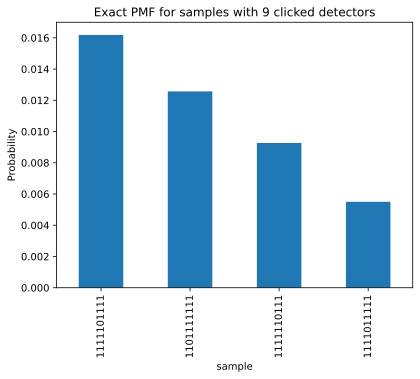

In [38]:
n_clicks = n_clicked

mask = df["n_clicks"]==n_clicks

df[mask].sort_values(by=["probability_exact"], ascending=False)["probability_exact"].plot(
    kind="bar",
    ylabel="Probability",
    title= f"Exact PMF for samples with {n_clicks} clicked detectors");



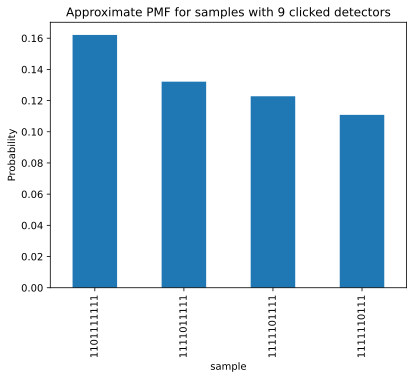

In [45]:
df[mask].sort_values(by=["probability_approx_4"], ascending=False)["probability_approx_4"].plot(
    kind="bar",
    ylabel="Probability",
    title= f"Approximate PMF for samples with {n_clicks} clicked detectors");

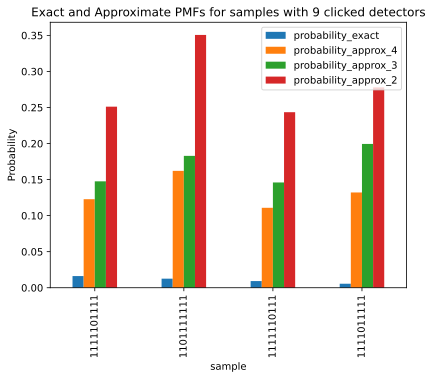

In [40]:
df[mask].sort_values(by=["probability_exact"], ascending=False)[["probability_exact", "probability_approx_4", "probability_approx_3", "probability_approx_2",]].plot(
    kind="bar",
    stacked=False,
    ylabel="Probability",
    title= f"Exact and Approximate PMFs for samples with {n_clicks} clicked detectors");



In [41]:
#export DataFrame
df.to_csv(path + "/output/samples_probabilities.csv") 

## Test the approximate probabilities
To assess the obtained probabilities, one can use the metrics below. Here

- $n$ is the number of data points.
- $p_i$ represents the exact probability assigned to the $i$ th data point. 
- $q_i$ represents the approximate probability assigned to the $i$ th data point.

### Relative Weighted Error

**Relative Weighted Error** quantifies the difference between observed and predicted values, considering their apsolute values. It is calculated using the following formula:

$$
RWE = \frac{1}{n}\sum_{i=1}^{n} \left| 1-\frac{p_i}{q_i} \right|
$$

### Mean Absolute Percentage Error
**Mean Absolute Percentage Error** helps compare model performance as this error is returned as a percentage:

$$
MAPE = \frac{1}{n}\sum_{i=1}^{n} \left|\frac{p_i-q_i}{p_i}\right|
$$

### Cosine Similarity

**Cosine Similarity** between two distributions can be expressed as follows:

$$ 
CS = \frac{\sum_{i=1}^{n} p_i \cdot q_i}{\sqrt{\sum_{i=1}^{n} p_i^2} \cdot \sqrt{\sum_{i=1}^{n} q_i^2}} $$

A value of 1 indicates perfect similarity, while values closer to 0 indicate decreasing similarity. 

### Total Variation Distance 

**Total Variation Distance** between two probability distributions can be expressed as follows:

$$
TVD = \max_{i \in (1,n)}(|p_i-q_i|) 
$$

### Fidelity 
**Fidelity** measures the similarity or overlap between two such distributions, and it is given by:

$$
F = \left(\sum_{i=1}^{n} \sqrt{p_i \cdot  q_i}\right)^2
$$

It quantifies how close two distributions are to each other, with higher fidelity values indicating greater similarity.
 


In [42]:
df_tests = get_tests_df(df)

df_tests.head()

,"(p_exact, p_exact)","(p_exact, p_appr_2)","(p_exact, p_appr_3)","(p_exact, p_appr_4)","(p_exact, p_uniform)"
metric,,,,,
relative weighted error,0.000000,0.960461,0.932624,0.916345,10.142004
mape,0.000000,29.048288,17.916423,13.115059,0.894765
cosine similarity,1.000000,0.932169,0.903852,0.936028,0.939855
total variation distance,0.000000,0.338070,0.193894,0.149539,0.015209
fidelity,0.001894,0.046976,0.027793,0.022119,0.000164
